In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_csv = "data/classify.csv"
rf_df = pd.read_csv(file_csv, encoding="ISO-8859-1")
rf_df.head()

,IsHoliday,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,0,18689.54,10382.90,6115.67,215.07,2406.62,6551.42
1,0,19050.66,6074.12,254.39,51.98,427.39,5988.57
2,1,20911.25,410.31,98.00,55805.51,8.00,554.92
3,0,25293.49,5629.51,68.00,1398.11,2084.64,20475.32
4,0,33305.92,4640.65,19.00,105.02,3639.42,14461.82


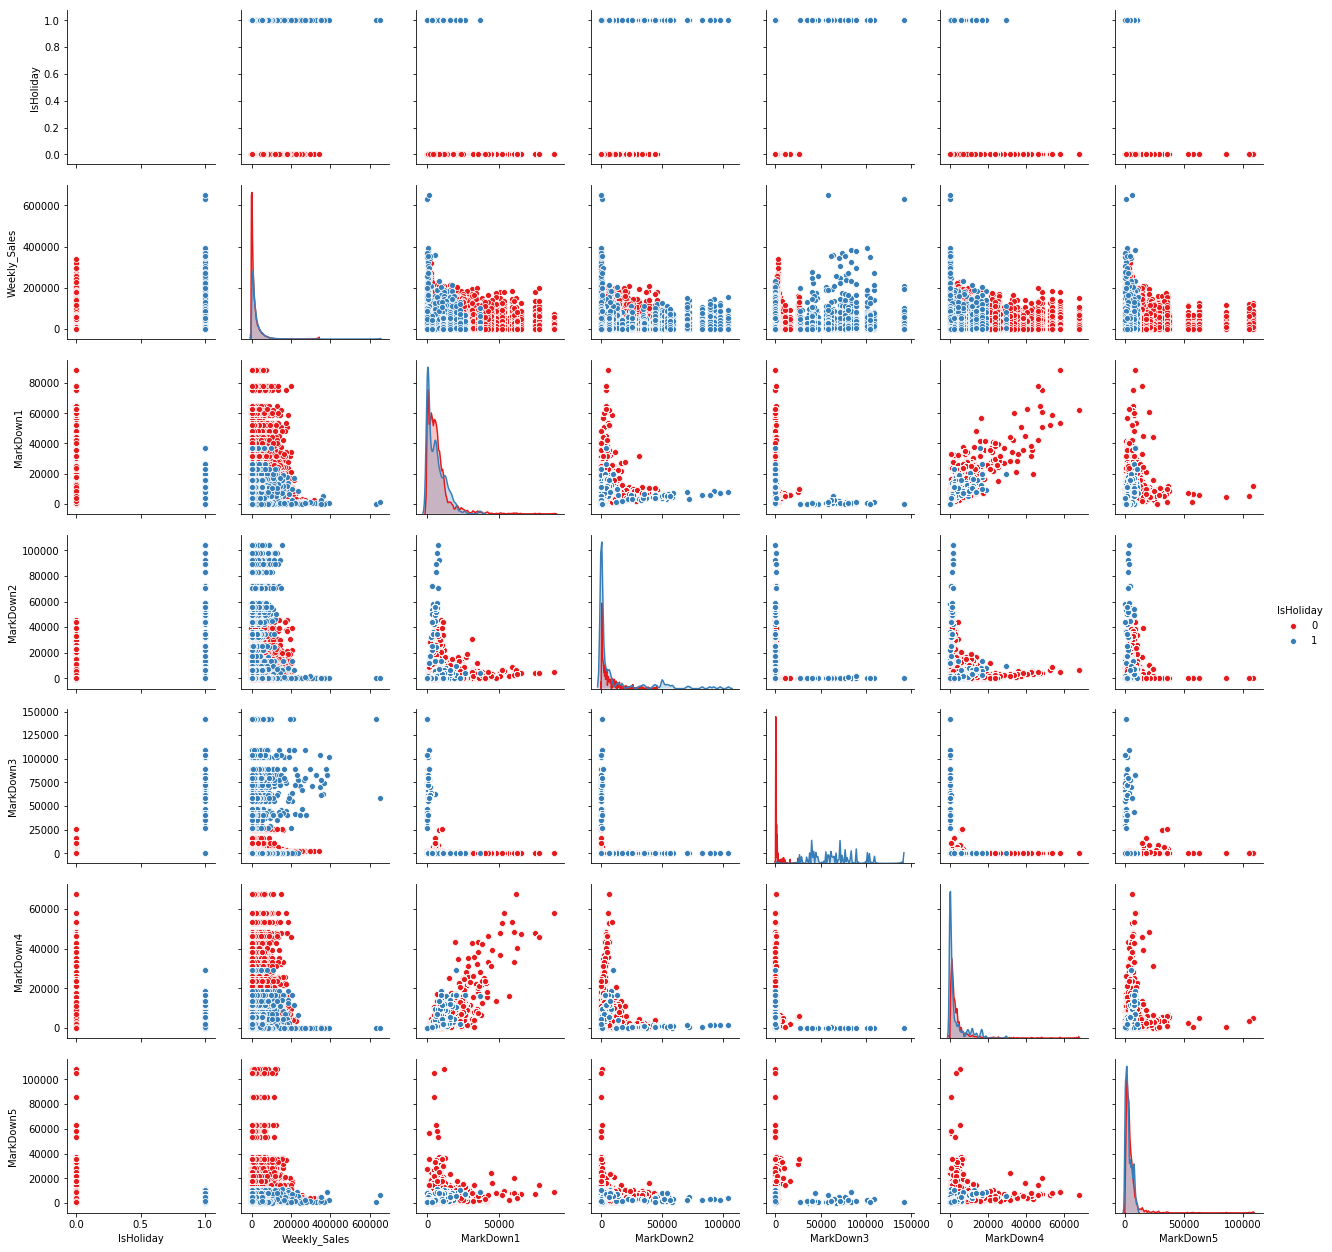

In [3]:
sns.pairplot(rf_df,hue='IsHoliday',palette='Set1')

In [4]:
X = rf_df.loc[:, rf_df.columns != 'IsHoliday']
X.head()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,18689.54,10382.90,6115.67,215.07,2406.62,6551.42
1,19050.66,6074.12,254.39,51.98,427.39,5988.57
2,20911.25,410.31,98.00,55805.51,8.00,554.92
3,25293.49,5629.51,68.00,1398.11,2084.64,20475.32
4,33305.92,4640.65,19.00,105.02,3639.42,14461.82


In [5]:
y = rf_df['IsHoliday'].to_frame()
y.head()

,IsHoliday
0,0
1,0
2,1
3,0
4,0


In [14]:
# Count of target values
y['IsHoliday'].value_counts()

0    138739
1     11942
Name: IsHoliday, dtype: int64

In [18]:
# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.20)

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27687
           1       1.00      1.00      1.00      2450

   micro avg       1.00      1.00      1.00     30137
   macro avg       1.00      1.00      1.00     30137
weighted avg       1.00      1.00      1.00     30137



In [24]:
print(confusion_matrix(y_test,predictions))

[[27687     0]
 [    0  2450]]


In [25]:
rfc = RandomForestClassifier(n_estimators=60)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rfc_pred))

[[27687     0]
 [    0  2450]]


In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27687
           1       1.00      1.00      1.00      2450

   micro avg       1.00      1.00      1.00     30137
   macro avg       1.00      1.00      1.00     30137
weighted avg       1.00      1.00      1.00     30137



In [29]:
MAE = mean_absolute_error(y_test,rfc_pred)
print(MAE)

0.0
